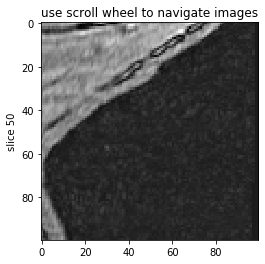

In [1]:
# -*- coding: utf-8 -*-
"""
Created on Fri Jan 31 14:47:24 2020

@author: Richard Schultheis
"""
import sys
import os
import numpy as np
import matplotlib.pyplot as plt
import argparse
import SimpleITK as sitk
#os.chdir('C:\\Users\Richard Schultheis\Google Drive\BBE\\6\py\sitk')





class IndexTracker(object):
    def __init__(self, ax, X):
        self.ax = ax
        ax.set_title('use scroll wheel to navigate images')

        self.X = X
        rows, cols, self.slices = X.shape
        self.ind = self.slices//2

        self.im = ax.imshow(self.X[:, :, self.ind],cmap= 'gray')
        self.update()

    def onscroll(self, event):
        print("%s %s" % (event.button, event.step))
        if event.button == 'up':
            self.ind = (self.ind + 1) % self.slices
        else:
            self.ind = (self.ind - 1) % self.slices
        self.update()

    def update(self):
        self.im.set_data(self.X[:, :, self.ind])
        self.ax.set_ylabel('slice %s' % self.ind)
        self.im.axes.figure.canvas.draw()


def plot3d(image):
    original=image
    original = np.transpose(original, (2, 0, 1))
    # original = np.rot90(original, k=-1)
    original = np.rot90(original, k=-1)
    fig, ax = plt.subplots(1, 1)
    tracker = IndexTracker(ax, original)
    fig.canvas.mpl_connect('scroll_event', tracker.onscroll)
    plt.show()
    
def plot2d(image):
    original=((image[::2,::2])[::2,::2])[::2,::2]
    #original = np.rot90(original, k=-1)
    #fig, ax = plt.subplots(1, 1)
    
    plt.imshow(sitk.GetArrayViewFromImage(original))
    
#def changeContrast(image):
    
def plotAgainstLowRes(image):
        im1LowRes=image[::16,::16]
        
        plt.subplot(2,1,1)
        plt.imshow(sitk.GetArrayViewFromImage(image))
        plt.axis('off')
        
        plt.subplot(2,1,2)
        plt.imshow(sitk.GetArrayViewFromImage(im1LowRes))
        plt.axis('off')
        
        
def contrast(image, c):
    array = np.transpose(sitk.GetArrayFromImage(image), axes=(2, 1, 0))
    spacing = image.GetSpacing()
    direction = image.GetDirection()
    origin = image.GetOrigin()

    shape = array.shape
    ntotpixel = shape[0] * shape[1] * shape[2]
    IOD = np.sum(array)
    luminanza = int(IOD / ntotpixel)

    max = 255
    

    d = array - luminanza
    dc = d * abs(c) / 100

    if c >= 0:
        J = array + dc
        J[J >= max] = max
        J[J <= 0] = 0
    else:
        J = array - dc
        J[J >= max] = max
        J[J <= 0] = 0

    J = J.astype(int)

    img = sitk.GetImageFromArray(np.transpose(J, axes=(2, 1, 0)))
    img.SetDirection(direction)
    img.SetOrigin(origin)
    img.SetSpacing(spacing)

    return img


def aeh(image,alpha,beta,outMax,outMin):
#Standard Implementation: aeh(image,0.9,0.6.255,0)

    adapt = sitk.AdaptiveHistogramEqualizationImageFilter()
    adapt.SetAlpha(alpha)
    adapt.SetBeta(beta)
    image = adapt.Execute(image)  # set mean and std deviation

    normalizeFilter = sitk.NormalizeImageFilter()
    resacleFilter = sitk.RescaleIntensityImageFilter()
    resacleFilter.SetOutputMaximum(255)
    resacleFilter.SetOutputMinimum(0)
    image = normalizeFilter.Execute(image)  # set mean and std deviation
    image = resacleFilter.Execute(image)  # set intensity 0-255

    return image


'''
    os.chdir('C:\\Users\Richard Schultheis\Downloads\carotid')
    im1=sitk.ReadImage('C:\\Users\Richard Schultheis\Google Drive\BBE\\6\py\sitk\Sockel_red.jpg')
    #im1Transposed=np.transpose(im1,(1,0))    
    plot2d(im1)
    plotAgainstLowRes(im1)    
'''
   
im3d=sitk.ReadImage('C:\\Users\\Richard Schultheis\\Downloads\carotid\HC002.nii')
#im3dLowRes=im3d[::7,::7,::7]
#im3d.GetSize()
#im3dLowRes.GetSize()
im3dCut=im3d[0:100,0:100,0:100]
#im3dCut.GetSize()

#np3d=sitk.GetArrayFromImage(im3dCut)
#type(im3dCut)
#type(contrast(im3dCut,0))
#aeh(image,0.9,0.6.255,0)

#plot3d(sitk.GetArrayFromImage(im3dCut)[:,:,:])

#plot3d(sitk.GetArrayFromImage(contrast(aeh(im3dCut),1))[:,:,:])

plot3d(sitk.GetArrayFromImage(aeh(im3dCut,1,0.7,255,0))[:,:,:])
